In [1]:
import os
os.chdir("../../")
from poisson_solver import *

Libraries fetched!...



Problem

$$
\nabla^2 u = f \quad (x,y)\in [0,1]\times[0,1]\\
u(0,y) = q_1 \quad 0 \leq y\leq 1\\
u(1, y) = q_2 \quad 0\leq y\leq 1\\
\partial_x u(x,0)n_1 + \partial_y u(x,0)n_2 = q_3 \quad 0\leq x \leq 1\\
\partial_y u(x,1)n_1 + \partial_y u(x,1)n_2= q_4 \quad 0\leq x \leq 1
$$

$$
f = -2\sin(x)\sin(y)\\
q_1 = q_2= \sin(x)\sin(y)\\
q3 = q_4 = \cos(x)\sin(y) + \sin(x)\cos(y)
$$

In [2]:
mesh = meshio_to_fd(naca_mesh("0012", 15))

In [3]:
model = PoissonSolver(mesh, P = 9)

In [4]:
rhs = lambda x, y: 0 #-2*fd.sin(x)*fd.sin(y)
model.impose_rhs(rhs, func_type = 'callable')

In [5]:
model.impose_NBC(bc_func = -fd.Constant(1.0), bc_idx = 1)
model.impose_NBC(bc_func = fd.Constant(1.0), bc_idx = 2)
model.impose_NBC(bc_func=fd.Constant(0.0), bc_idx=3)
model.impose_NBC(bc_func=fd.Constant(0.0), bc_idx=4)

In [6]:
model.x

Indexed(SpatialCoordinate(Mesh(VectorElement(FiniteElement('Lagrange', triangle, 1), dim=2), 0)), MultiIndex((FixedIndex(0),)))

In [7]:
model.solve(solver_params={'pc_type': 'lu'})

KeyboardInterrupt: 

In [ ]:
model.u_sol -= np.min(model.u_sol.dat.data)

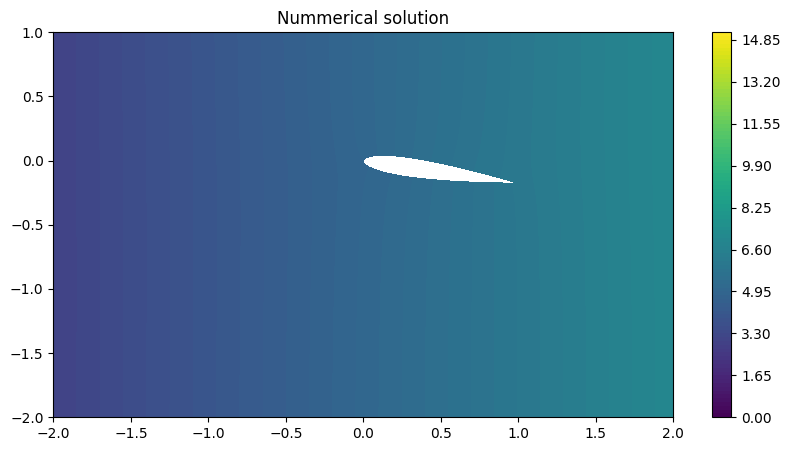

In [ ]:
model.plot_results(norm = "H1", levels = 100, figsize = (10, 5), ylim = (-2,1), xlim = (-2, 2))

In [ ]:
u0 = model.u_sol
u0.dat.data

array([6.00450751, 6.00418883, 6.00375239, ..., 4.9355539 , 4.93608568,
       4.93646213], shape=(84249,))

In [ ]:
V = fd.Function(model.W)
V.project(fd.grad(u0))

Coefficient(WithGeometry(FunctionSpace(<firedrake.mesh.MeshTopology object at 0xffff47822bd0>, VectorElement(FiniteElement('Lagrange', triangle, 9), dim=2), name=None), Mesh(VectorElement(FiniteElement('Lagrange', triangle, 1), dim=2), 0)), 16)

In [ ]:
V.boundary_nodes(4)

NameError: name 'V' is not defined